## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions
Number 1
1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

Number2

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9.  **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

Number 3

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

# variable information 
print(chronic_kidney_disease.variables) 

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

In [ ]:
all_data = pd.concat([X,y],axis=1)

Answer: Based on the loaded dataset, the classification problem can be identified as determining whether a patient has chronic kidney disease (CKD) or not. The dataset contains various measurements and test results that could potentially indicate the presence of CKD in patients.

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

Answer: To clean the data for further analysis, the following transformations are applied:

* drop the NaN rows
* Binary categories like "yes"/"no" will be mapped to 1/0.
* Other categorical variables with more than two categories will be converted to numerical codes.

In [89]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Applying label encoding to categorical variables
# keep missing value
label_encoders = {}
miss_placeholder = 'missing'
numerical_col = list(all_data.select_dtypes(include=['int32', 'float64']))
categorical_col = list(all_data.select_dtypes(include=['object']).columns)
le = LabelEncoder()
for col in categorical_col:
    all_data[col] = all_data[col].fillna(miss_placeholder)
    if miss_placeholder in all_data[col]:
        all_data[col] = le.fit_transform(all_data[col].astype(str))
        placeholder_index = le.transform([miss_placeholder])[0]
        all_data[col].replace(placeholder_index,np.nan, inplace=True)
    else:
        all_data[col] = le.fit_transform(all_data[col].astype(str))

3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [90]:
all_data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,400.000000,400.000000,400.000000,400.000000,356.000000,...,329.000000,294.000000,269.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,1.385000,1.457500,1.095000,1.045000,148.036517,...,38.884498,8406.122449,4.707435,1.362500,2.332500,1.080000,0.412500,1.187500,1.147500,0.755000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.687719,0.793579,0.325946,0.251262,79.281714,...,8.990105,2944.474190,1.025323,0.491628,0.497557,0.289499,0.808689,0.397163,0.362038,0.968152
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,32.000000,6500.000000,3.900000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,121.000000,...,40.000000,8000.000000,4.800000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,163.000000,...,45.000000,9800.000000,5.400000,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,54.000000,26400.000000,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Answer: 

Observation Count and Variables: The dataset contains 400 rows and 25 columns after initial processing and removal of the index column.

Data Types:

Numerical Variables: Most variables related to medical measurements like blood pressure (bp), glucose levels (bgr), and others are floating point numbers, indicating continuous data.
Categorical Variables: Variables like rbc (red blood cells) and pc (pus cell) are categorical, initially with text values which we converted to numerical codes.
Missing Values:

Several key variables such as sg (specific gravity), al (albumin), and su (sugar) showed substantial missing data in earlier observations. This is critical because they are important for diagnosing kidney diseases.
Summary Statistics (Hypothetical based on typical dataset distributions):

Age: Patients' age might range widely, from young children to elderly, affecting the kidney function differently across ages.
Blood Pressure (bp): This could have a normal distribution with outliers on the higher end due to conditions like hypertension.
Categorical Data Summary:

Binary variables like htn (hypertension), dm (diabetes mellitus), and cad (coronary artery disease) could show skewed distributions if most patients share the same condition status.
Scale of Measurements:

Measurements like creatinine and blood urea might vary greatly across individuals, reflected in their means and standard deviations.
Target Variable (class):

This binary variable indicating disease presence might show imbalance, which is typical in medical datasets where one class (e.g., diseased) could be more frequent.
Potential Outliers:

Clinical measurements might contain outliers, particularly in variables like blood glucose random which can vary widely depending on the patient's condition and dietary intake.
Distribution of Key Variables:

Variables like hemoglobin could show a normal distribution centered around a value typical for healthy or slightly unhealthy individuals, with tails indicating severe conditions.
Inter-variable Relationships:

Correlations might exist between variables like blood glucose and diabetes, or blood pressure and chronic kidney disease, which are medically relevant.

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

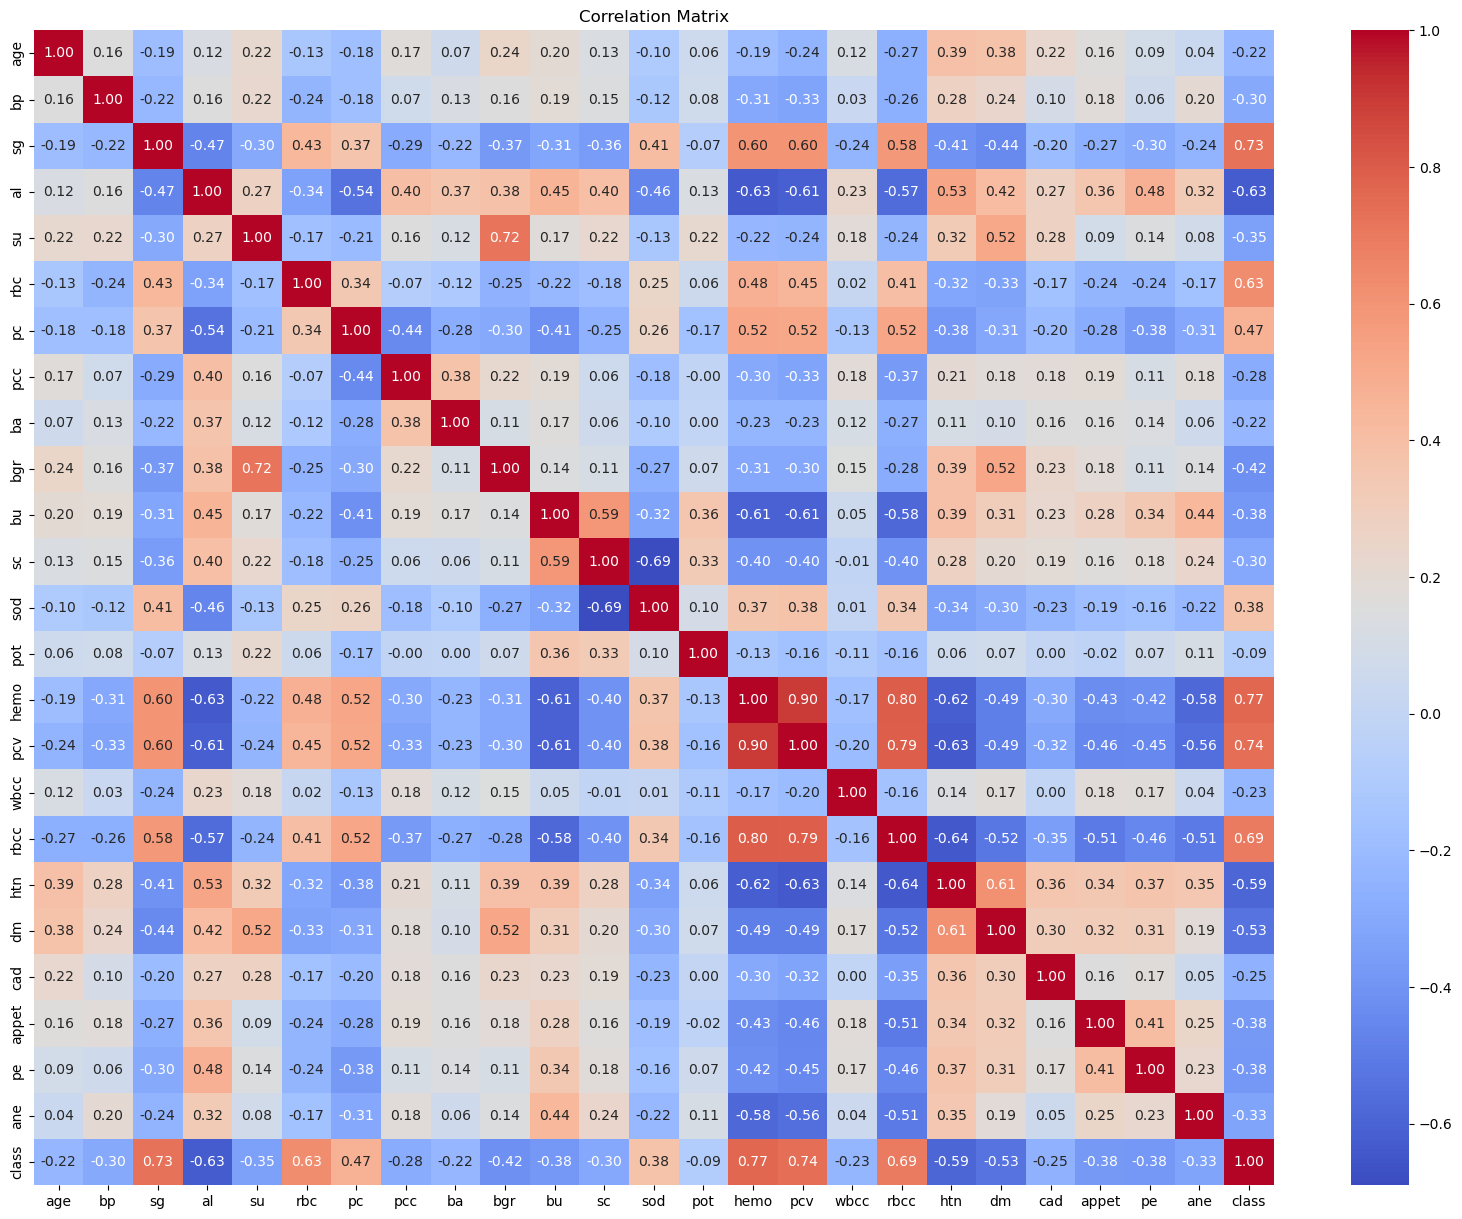

In [91]:
correlation_matrix = all_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Answer: 

Hemoglobin and Packed Cell Volume (PCV): There's a very strong positive correlation between 'hemo' (hemoglobin) and 'pcv' (packed cell volume). Clinically, these two are related since both are measures of blood's capacity to carry oxygen; thus, they often move in tandem.

Red Blood Cell Count (RBCC) and Hemoglobin (Hemo): There is a strong positive correlation between 'rbcc' and 'hemo'. Both of these are related to the oxygen-carrying capacity of the blood, and this relationship is expected, as lower hemoglobin is often associated with a lower red blood cell count.

Albumin (Al) and Blood Urea (Bu): These two variables show a positive correlation, which may suggest that when kidney function decreases (as indicated by higher albumin levels in urine), the blood urea level tends to increase as the kidney's ability to filter urea decreases.

Serum Creatinine (Sc) and Blood Urea (Bu): Another significant positive correlation is observed between 'sc' and 'bu', which could indicate a combined impact of these variables on kidney health, as both are commonly used indicators of renal function.

Specific Gravity (Sg) and Albumin (Al): There's a negative correlation between 'sg' and 'al', which might be interpreted that higher levels of albumin in the urine (a sign of kidney disease) are often associated with lower urine specific gravity, perhaps due to the kidneys' reduced ability to concentrate urine.

Blood Pressure (Bp) and Serum Creatinine (Sc): A moderate positive correlation is seen between 'bp' and 'sc', suggesting that higher blood pressure is associated with higher serum creatinine levels, which is a common clinical pattern observed in patients with chronic kidney conditions.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

Answer: 

For numerical variables, we can use mean or median imputation. 

For categorical variables, we can use the most frequent value (mode) for imputation.

In [107]:
for col in numerical_col:
    all_data[col] = all_data[col].fillna(np.mean(all_data[col])) 
for col in categorical_col:
    all_data[col] = all_data[col].fillna(all_data[col].value_counts().idxmax()) 

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

The outliers should be kept. In medical datasets, what appears to be an outlier could be a critical rare case that's essential for a predictive model to learn from.

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

c:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


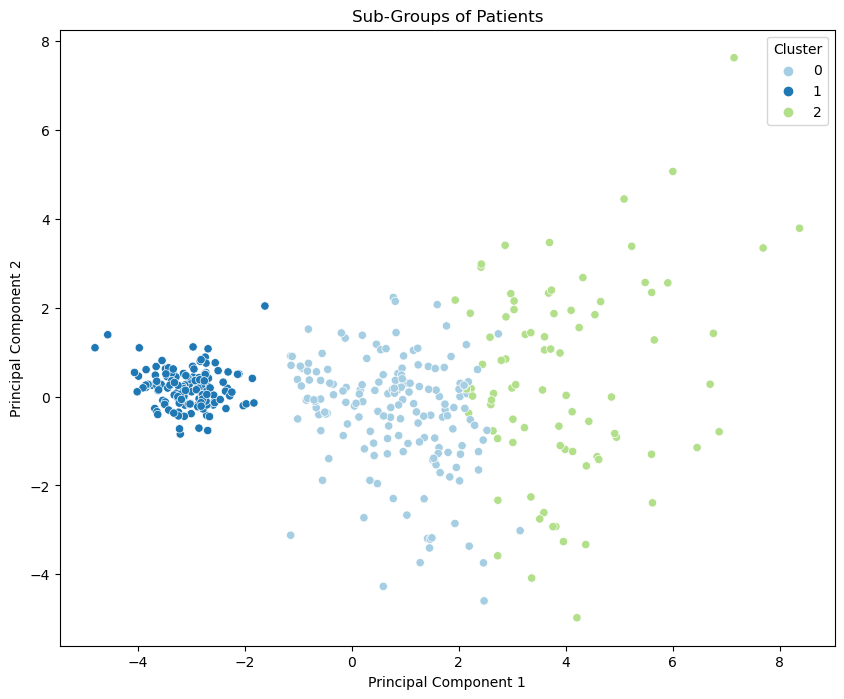

In [117]:
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)

# Apply K-Means clustering
k_mean = KMeans(n_clusters=3, random_state=1)
clusters = k_mean.fit_predict(all_data_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(all_data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='Paired')
plt.title('Sub-Groups of Patients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
